In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [3]:
cancer= load_breast_cancer()

### PCA적용해서 유방암 데이터셋 시각화하기

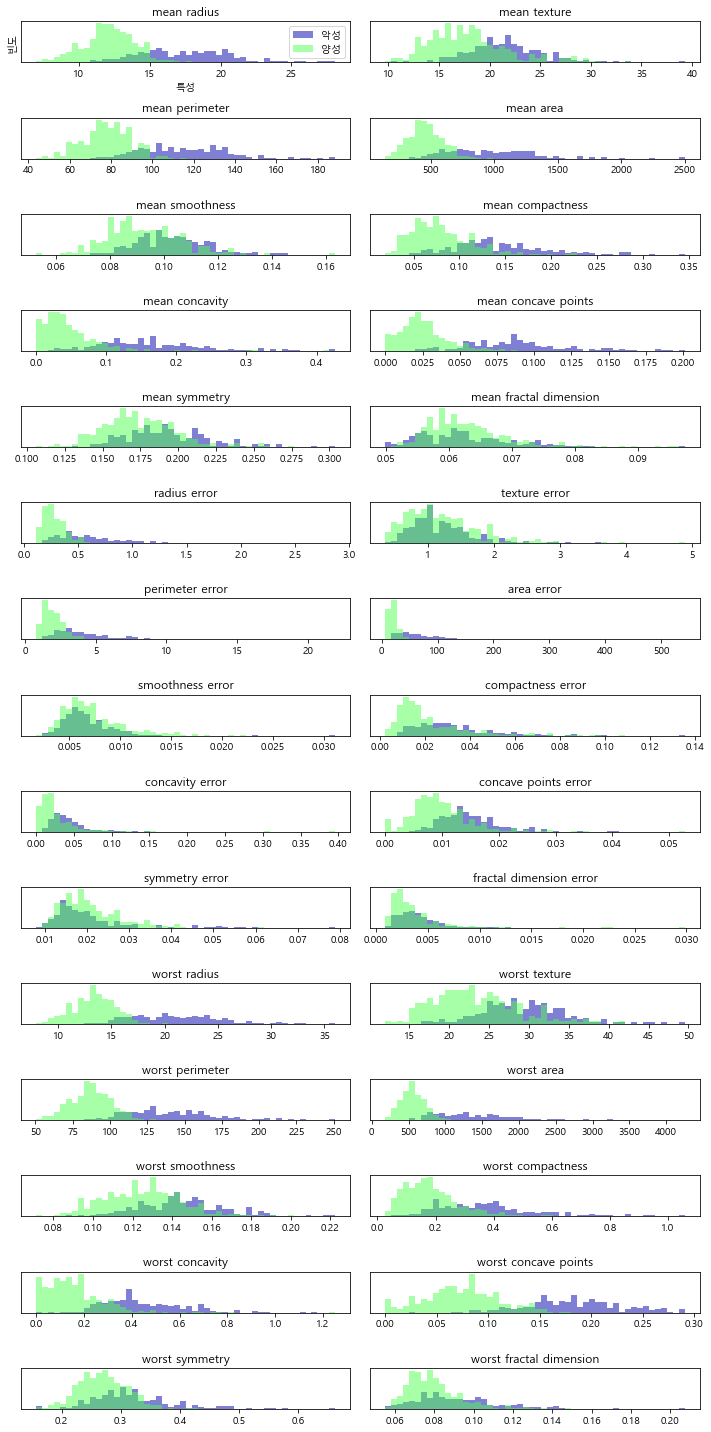

In [4]:
fig, axes= plt.subplots(15, 2, figsize= (10, 20))

melignant= cancer.data[cancer.target == 0] # 악성
benign= cancer.data[cancer.target == 1] # 양성

ax= axes.ravel()

for i in range(30):
    _, bins= np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(melignant[:, i], bins= bins, color= mglearn.cm3(0), alpha= .5)
    ax[i].hist(benign[:, i], bins= bins, color= mglearn.cm3(2), alpha= .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc= 'best')
fig.tight_layout()

### 양성, 악성별 주성분 그래프 그려보기

In [5]:
from sklearn.preprocessing import StandardScaler
x_scale= StandardScaler().fit_transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 2).fit(x_scale)

In [7]:
# 처음 두개의 주성분을 사용하여 데이터 변환
x_pca= pca.transform(x_scale)

In [8]:
print('원본 데이터 형태: ', str(x_scale.shape))
print('축소된 데이터 형태: ', str(x_pca.shape))

원본 데이터 형태:  (569, 30)
축소된 데이터 형태:  (569, 2)


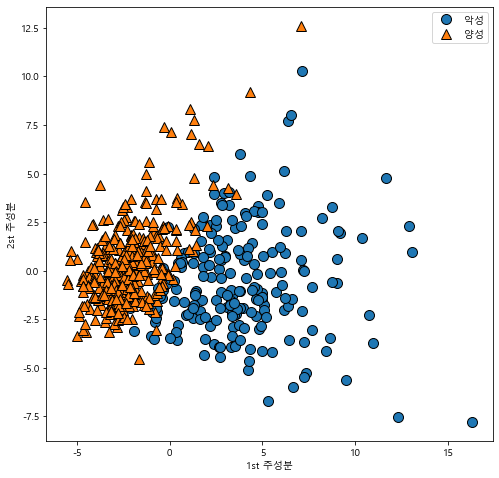

In [9]:
# 클래스를 색상별로 구분해서 처음 두 개의 주성분을 그래프로 구현
plt.figure(figsize= (8,8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc= 'best')
plt.xlabel('1st 주성분')
plt.ylabel('2st 주성분')
plt.show()

In [10]:
print('주성분: ', pca.components_)

주성분:  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
